In [57]:
# Requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

plt.style.use('_mpl-gallery')
# Requirement tools from sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from xgboost import XGBRegressor

In [20]:

from google.colab import files

uploaded = files.upload()

Saving cardata.csv to cardata.csv


In [21]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['cardata.csv']))
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [26]:
# now we delete duplicated data
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
294,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [27]:
# before check noise convert Year columns to Age:
df2 = df.copy()
df2['Age'] = (df.Year.max()+1) - df.Year
df2.drop(['Year'], axis='columns', inplace=True)
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
295,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
296,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
297,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [28]:
# fist split df2 to categorical and numerical data:
df2_num = df2.select_dtypes(['int64', 'float64'])
df2_cat = df2.select_dtypes(['object'])

In [30]:
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
295,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
296,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
297,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


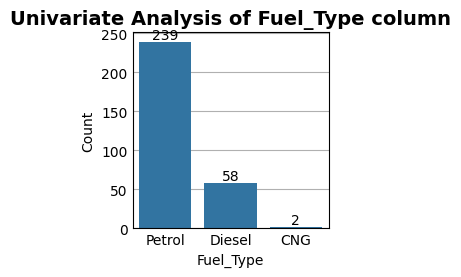

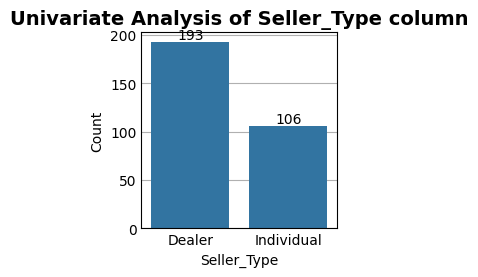

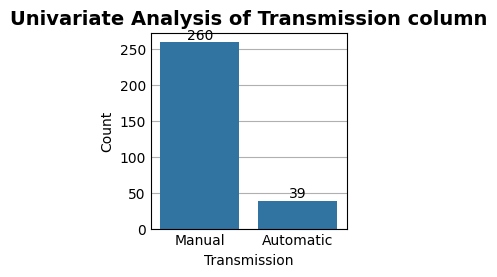

In [34]:
# draw barplot again for categorical univariate analysis:
%matplotlib inline
for col in df2_cat:
    check_syntax = df2_cat[col].value_counts().to_frame().reset_index()
    check_syntax.rename(columns={f'{col}': 'Count', 'index':f'{col}'}, inplace=True)
    ax = sns.barplot(data=check_syntax, x=f'{col}', y='Count')
    ax.bar_label(ax.containers[0])
    plt.title(f"Univariate Analysis of {col} column", fontsize=14, fontweight='bold')
    plt.show()

# we can use this code for each feature instead of above code
# df_cat.Fuel_Type.value_counts().plot.barh()

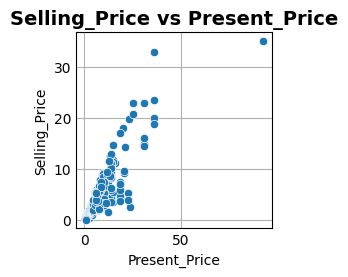

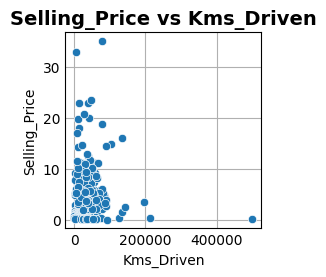

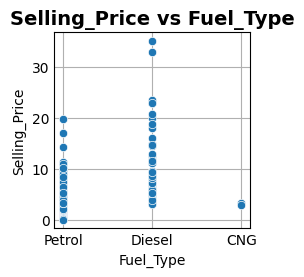

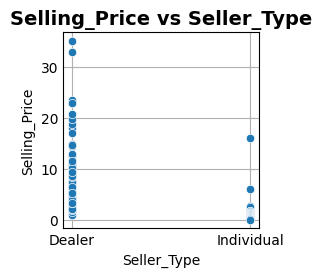

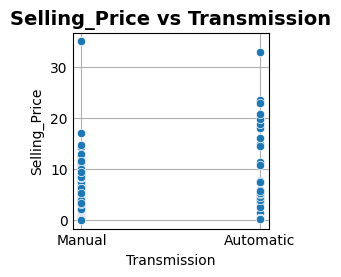

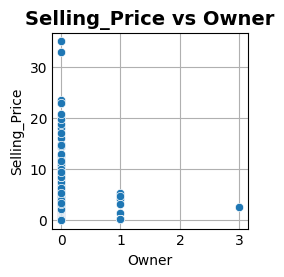

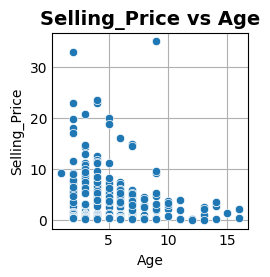

In [36]:
%matplotlib inline
for col in df2.columns[1:]:
    sns.scatterplot(x=df2[col], y=df2.Selling_Price)
    plt.title(f'Selling_Price vs {col}', fontsize=14, fontweight='bold')
    plt.show()

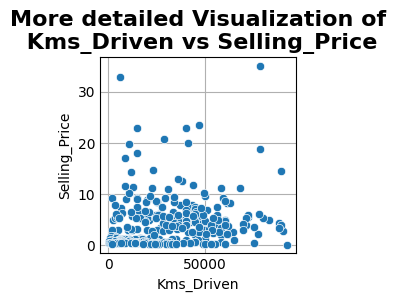

In [53]:
%matplotlib inline
sns.scatterplot(data=df2[df2.Kms_Driven < 100000], x='Kms_Driven' , y = 'Selling_Price')
plt.title('More detailed Visualization of\n Kms_Driven vs Selling_Price', fontsize=16, fontweight='bold')
plt.show()

In [54]:


# create Transmission rate of numeric data type where Tramsmission "Automatic"= 1, "Manual" =0
df3 = df2.copy()
df3['Transmission_rate'] = np.where(df3.Transmission == 'Automatic', 1, 0)
df3.Transmission_rate.value_counts()

# create Seller_Type rate of numeric data type where Transmission "Dealer"= 1, "Individual" =0
df3['Seller_Type_rate'] = np.where(df3.Seller_Type == 'Dealer', 1, 0)
df3.Seller_Type_rate.value_counts()

# prepare the dataframe we use for modeling:
# " first we encoding Transmission, Seller_Type and
# Fuel_Type by int number except 0 and 1 beacuse of
#  in more dimention 0 and 1 is constant "
df4 = df2.copy()
df4['Transmission'] = np.where(df4.Transmission == 'Automatic', 2, 3)
df4['Seller_Type'] = np.where(df4.Seller_Type == 'Dealer', 2, 3)
df4.Fuel_Type.replace({'Diesel':2, 'Petrol':3, 'CNG':4}, inplace=True)

df4

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,3,2,3,0,5
1,4.75,9.54,43000,2,2,3,0,6
2,7.25,9.85,6900,3,2,3,0,2
3,2.85,4.15,5200,3,2,3,0,8
4,4.60,6.87,42450,2,2,3,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,2,2,3,0,3
295,4.00,5.90,60000,3,2,3,0,4
296,3.35,11.00,87934,3,2,3,0,10
297,11.50,12.50,9000,2,2,3,0,2


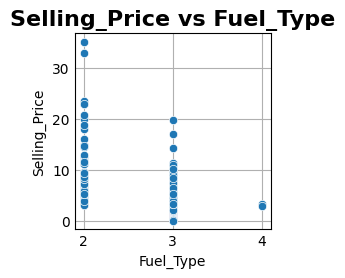

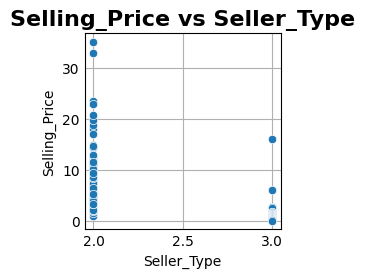

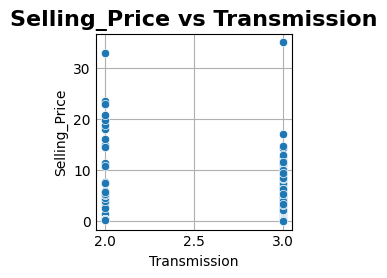

In [55]:
%matplotlib inline
for col in df4[['Fuel_Type','Seller_Type','Transmission']]:
    sns.scatterplot(data=df4, x=col, y='Selling_Price')
    plt.title(f'Selling_Price vs {col}', fontsize=16, fontweight='bold')
    plt.show()

In [43]:
# This dataset use for create Linear Regression Model
df4

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,3,2,3,0,5
1,4.75,9.54,43000,2,2,3,0,6
2,7.25,9.85,6900,3,2,3,0,2
3,2.85,4.15,5200,3,2,3,0,8
4,4.60,6.87,42450,2,2,3,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,2,2,3,0,3
295,4.00,5.90,60000,3,2,3,0,4
296,3.35,11.00,87934,3,2,3,0,10
297,11.50,12.50,9000,2,2,3,0,2


In [49]:
# normalize by MinMaxScaler:
# we normalize only Present_Price, Kms_Drvien and Age because
# other feature in between 1 to 4 and no need to normalize
scaler = MinMaxScaler(feature_range=(1,4))
norm = scaler.fit_transform(df4[['Present_Price', 'Kms_Driven','Age']])
norm = pd.DataFrame(norm, columns=['Present_Price', 'Kms_Driven','Age'])
norm = pd.concat([norm, df4[['Fuel_Type','Seller_Type',	'Transmission',	'Owner', 'Selling_Price']]], axis=1)
norm

,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,1.171326,1.159159,1.8,3,2,3,0,3.35
1,1.299740,1.255255,2.0,2,2,3,0,4.75
2,1.309818,1.038438,1.2,3,2,3,0,7.25
3,1.124512,1.028228,2.4,3,2,3,0,2.85
4,1.212939,1.251952,1.8,2,2,3,0,4.60
...,...,...,...,...,...,...,...,...
294,1.366710,1.201129,1.4,2,2,3,0,9.50
295,1.181404,1.357357,1.6,3,2,3,0,4.00
296,1.347204,1.525129,2.8,3,2,3,0,3.35
297,1.395969,1.051051,1.2,2,2,3,0,11.50


In [50]:
%matplotlib inline

CV = []
R2_train = []
R2_test = []
MAE_train = []
MAE_test = []


def modeling(x, y, k,test_size):
    """ fit model, print result, perform cross validation, draw plots for model"""

# y_train => eğitim verisi satış fiyatı (selling_price) & x_train => eğitim verisi (vites tipi, sahibindenmi&galerimi, yaşı, yakıt tipi, kilometre, günümüz fiyatı)

# test ve eğitim verisini ayırıyor.
    # train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

#Model'i tanımlayıp, eğitimi başlatıyor.
    # fit model
    model = LinearRegression()
    model.fit(x_train, y_train)

#Eğitilen datayı test ediyor. (0.80'nini kullanıyor.)
    # R2 Score of train set:
    y_pred_train = model.predict(x_train)
    r2_train_model = metrics.r2_score(y_train, y_pred_train)
    # MAE and MSE of train set:
    mae_train_model = metrics.mean_absolute_error(y_train, y_pred_train)

#Burada gerçek test, yani import edilen datayı test ediyor. (0.20'sini kullanıyor.)

    # R2 Score of test set:
    y_pred_test = model.predict(x_test)
    r2_test_model = metrics.r2_score(y_test, y_pred_test)
    # MAE and MSE of train set:
    mae_test_model = metrics.mean_absolute_error(y_test, y_pred_test)
    mse_test_model = metrics.mean_squared_error(y_test, y_pred_test)

    # R2 mean of train set using Cross validation:
    kf = KFold(k)
    cross_val = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')
    cv_mean = np.mean(cross_val)


    # Printing results
    print('='*30,'Shape','='*30)
    print("x train: ",x_train.shape)
    print("x test: ",x_test.shape)
    print("y train: ",y_train.shape)
    print("y test: ",y_test.shape)
    print('='*30,'R2_score and CV','='*30)
    print("Train R2-score :", round(r2_train_model, 3))
    print("Test R2-score :", round(r2_test_model, 3))
    print("Train MAE :", round(mae_train_model, 3))
    print("Test MAE :", round(mae_test_model, 3))
    print("Train CV scores :", cross_val)
    print("Train CV mean :", round(cv_mean, 3))

#Grafik çiziminde veriyi ayarlıyor.
    # append_result:
    R2_train.append(round(r2_train_model, 3))
    MAE_train.append(round(mae_train_model, 3))
    R2_test.append(round(r2_test_model, 3))
    MAE_test.append(round(mae_test_model, 3))
    CV.append(round(cv_mean, 3))

#Grafik çiziliyor.
    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,3,figsize = (15,4))
    ax[0].set_title('Residual Plot of Train samples', fontsize=14, fontweight='bold')
    sns.histplot((y_train-y_pred_train), kde=True, ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    # Y_test vs Y_pred_test scatter plot
    ax[1].set_title('y_test vs y_pred_test', fontsize=14, fontweight='bold')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    # MAE_test vs MAE_train line plot
    ax[2].set_title('MAE test vs MAE train', fontsize=14, fontweight='bold')
    sns.lineplot(data=pd.DataFrame({'MAE_train': MAE_train, 'MAE_test': MAE_test}), markers=True)
    ax[2].set_xlabel('M')
    ax[2].set_ylabel('MAE')

    plt.show()

    # Print results of model again
    print("Train R2-score :", round(r2_train_model, 3))
    print("Test R2-score :", round(r2_test_model, 3))

    # The parameters for linear regression model
    parameter = ['b']+ ['w_' + str(i) for i in range(1,x.shape[1]+1)]
    columns = ['intercept'] + x.columns.to_list()
    weight_table = pd.DataFrame({'Parameter': parameter, 'Columns': columns})
    sk_weight = [i for i in model.intercept_] + model.coef_.tolist()[0]
    weight_table = weight_table.join(pd.Series(sk_weight, name='Sk_weight'))
    return weight_table

In [51]:
# create 1st model by all feature by 1 dimension
norm1 = norm.copy()
x = norm1.drop('Selling_Price', axis='columns')
y = norm1.Selling_Price.values.reshape(-1,1)

============================== Shape ==============================
x train:  (239, 7)
x test:  (60, 7)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.891
Test R2-score : 0.759
Train MAE : 1.12
Test MAE : 1.276
Train CV scores : [0.85059935 0.78040354 0.74247225 0.80458231 0.91718101 0.86197372
 0.69297633 0.85668824 0.52906859 0.87159372]
Train CV mean : 0.791


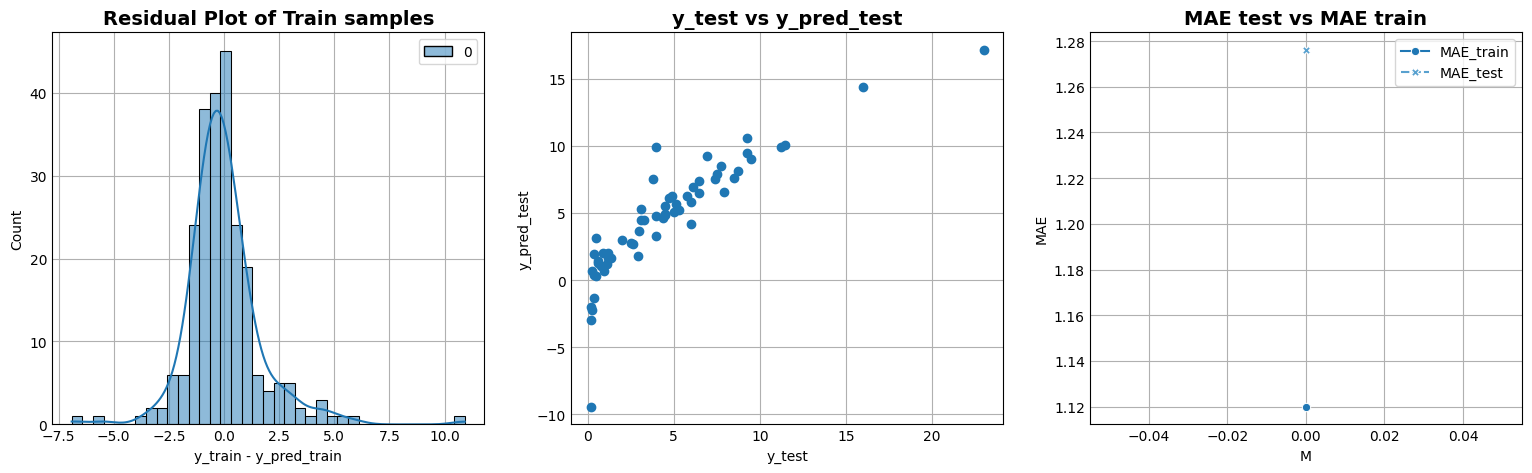

Train R2-score : 0.891
Test R2-score : 0.759


,Parameter,Columns,Sk_weight
0,b,intercept,7.286058
1,w_1,Present_Price,13.518100
2,w_2,Kms_Driven,-3.294581
3,w_3,Age,-1.547282
4,w_4,Fuel_Type,-1.831583
5,w_5,Seller_Type,-1.429887
6,w_6,Transmission,-1.360115
7,w_7,Owner,-0.904754


In [52]:
modeling(x, y, 10, 0.2)

In [71]:
%matplotlib inline

CV = []
R2_train = []
R2_test = []
MAE_train = []
MAE_test = []


def modelingXG(x, y, k,test_size):
    """ fit model, print result, perform cross validation, draw plots for model"""

# y_train => eğitim verisi satış fiyatı (selling_price) & x_train => eğitim verisi (vites tipi, sahibindenmi&galerimi, yaşı, yakıt tipi, kilometre, günümüz fiyatı)

# test ve eğitim verisini ayırıyor.
    # train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

#Model'i tanımlayıp, eğitimi başlatıyor. y_train => eğitim verisi satış fiyatı (selling_price) & x_train => eğitim verisi
    # fit model
    model = XGBRegressor(booster='gbtree', objective='reg:squarederror')
    model.fit(x_train, y_train)

#Eğitilen datayı test ediyor. (0.80'nini kullanıyor.)
    # R2 Score of train set:
    y_pred_train = model.predict(x_train)
    r2_train_model = metrics.r2_score(y_train, y_pred_train)
    # MAE and MSE of train set:
    mae_train_model = metrics.mean_absolute_error(y_train, y_pred_train)

#Burada gerçek test, yani import edilen datayı test ediyor. (0.20'sini kullanıyor.)
    # R2 Score of test set:
    y_pred_test = model.predict(x_test)
    r2_test_model = metrics.r2_score(y_test, y_pred_test)
    # MAE and MSE of train set:
    mae_test_model = metrics.mean_absolute_error(y_test, y_pred_test)
    mse_test_model = metrics.mean_squared_error(y_test, y_pred_test)

    # R2 mean of train set using Cross validation:
    kf = KFold(k)
    cross_val = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')
    cv_mean = np.mean(cross_val)


    # Printing results
    print('='*30,'Shape','='*30)
    print("x train: ",x_train.shape)
    print("x test: ",x_test.shape)
    print("y train: ",y_train.shape)
    print("y test: ",y_test.shape)
    print('='*30,'R2_score and CV','='*30)
    print("Train R2-score :", round(r2_train_model, 3))
    print("Test R2-score :", round(r2_test_model, 3))
    print("Train MAE :", round(mae_train_model, 3))
    print("Test MAE :", round(mae_test_model, 3))
    print("Train CV scores :", cross_val)
    print("Train CV mean :", round(cv_mean, 3))

    # Print results of model again
    print("Train R2-score :", round(r2_train_model, 3))
    print("Test R2-score :", round(r2_test_model, 3))

In [72]:
modelingXG(x, y, 10, 0.2)

============================== Shape ==============================
x train:  (239, 7)
x test:  (60, 7)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 1.0
Test R2-score : 0.959
Train MAE : 0.006
Test MAE : 0.536
Train CV scores : [0.89722415 0.96255057 0.95697418 0.95673886 0.97169102 0.95865965
 0.88014645 0.97459994 0.97577947 0.93833969]
Train CV mean : 0.947
Train R2-score : 1.0
Test R2-score : 0.959
